## Time Series

![image.png](attachment:image.png)

### What is a Time Series?
A time series is a sequence of data points collected or recorded at regular intervals over a period of time. Each data point is associated with a specific timestamp, for example the time intervals can be annually, quarterly, monthly, weekly, daily, hourly. Time series data is found in various domains, such as finance (stock prices),training (weekly feedback), weather (temperature over time), and more.

**Time Period**:- The Interval of Time is recorded between one set to next set is called time period.

**The interval between difference observation need to be identical and the data should be in chronological order**

### What is Forecasting?

Forecasting is to predict or estimate a future event or trend, For businesses and analysts, forecasting is determining what is going to happen in the future by analyzing what happened in the past and what is going on now (The Forecasting is done based on the lags of timestamp)

#### Now will understand how time series different from the regular regression problem,

where as non time series data is an Interpolation and time series data is an Extrapolation(where we are forecasting the future)

![image.png](attachment:image.png)

## Interpolation vs. Extrapolation:

#### Interpolation:

- Interpolation is the process of estimating values within the range of known data points.
- It's used to fill in missing data or estimate values between existing observations.
- Example: Estimating the property price based on the square feet

#### Extrapolation:

- Extrapolation is the process of predicting values outside the range of known data points.
- It extends a trend or relationship beyond the observed data.
- Example: Predicting future stock prices based on historical data.

where as the extrapolation is quite uncertain and difficult (the uncertainty or the error will be keep on growing because it is dependent on previous uncertain datapoint

# Components of Time Series

![image.png](attachment:image.png)

![image.png](attachment:image.png)

**Trend:-** Time series data can also have a long-term trend, indicating an overall upward or downward movement over time. Understanding trends helps in making predictions.
Type of Trends:-
- Uptrends
- Downtrends
- Horizontal Trends
![image.png](attachment:image.png)

**Seasonality:-** It means Periodic Fluctuations. For Example retail Sales tend to peak for the christmas season and then decline after the holidays. So time series of retail sales will typically show increasing sales from September through December and declining sales in January and February. its nothing but fixed interval shift with short time.
![image-2.png](attachment:image-2.png)

**Cyclic:-**  Component refers to a pattern or fluctuation in the data that occurs with no fixed interval of time,
for example:- Longer-Term Fluctuationsy.

**Irregular:-** Components refers to noise, that represents the unexplained and unpredictable fluctuations generally during short periods ex:- Earthquake
![image-3.png](attachment:image-3.png)

## This are the above time series component makes our model more complex or difficult

----------------------------------------------------------------------------------------------------------------------

### Before building time series model we need to check if the time series data is stationary or not

### What is Stationary?

#### Stationary in Time Series means then Mean, Variance & Covariance of the series should not be a function of time rather than constant

#### Time Series Data can be stationary by removing their various components:
- Trend
- Seasonality
- Cyclic
- Irregularity

![image.png](attachment:image.png)

#### What are the Conditions need to be followed to satisfy Stationary

- Constant Mean
- Constant Variance
- Autocovariance does not depend on time             
Note:- Autocovariance is a measure of the covariance between a time series and a lagged version of itself.

#### Reason behind the non-stationarity of time series

- Trend in series
- Seasonality of time series

#### TEST TO CHECK STATIONARITY

- Rolling Statistics: Plot the moving average or variance and see if it varies with time
- ADF Test (Augmented Dickey–Fuller Test):

For ADF Test:- Null hypothesis is that the time series is nonstationary. The test results comprise of a test statistics and some critical values

if the Test Statistics < Critical values then the data is stationary and if the p-values is < level of signifance then we can state that the data is stationary

## Problem statement on Time Series

**Data Set** = Flights dataset using seaborn                  
**Problem Statement:-**           
    The aim of the project is to analyze and forecast monthly air prassenger traffic from 1949 to 1960.           

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
'01-'+df['month'].astype(str)+'-'+df['year'].astype(str)

0      01-Jan-1949
1      01-Feb-1949
2      01-Mar-1949
3      01-Apr-1949
4      01-May-1949
          ...     
139    01-Aug-1960
140    01-Sep-1960
141    01-Oct-1960
142    01-Nov-1960
143    01-Dec-1960
Length: 144, dtype: object

In [ ]:
df['monthyear'] = pd.to_datetime('01-'+df['month'].astype(str)+'-'+df['year'].astype(str))
df.head()

,year,month,passengers,monthyear
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [ ]:
new_df = df.set_index('monthyear')[['passengers']]
new_df

,passengers
monthyear,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


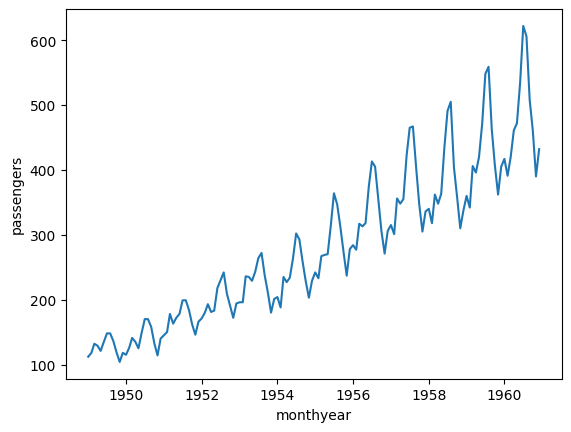

In [ ]:
sns.lineplot(data=new_df, x = new_df.index,y = new_df['passengers'])
plt.show()

### Now will check if my data is Stationary or not


#### 1. Using Rolling Statistics

In [ ]:
new_df['rollMean'] = new_df.passengers.rolling(window = 12).mean()
new_df['rollstd'] = new_df.passengers.rolling(window = 12).std()

In [ ]:
new_df.head()

,passengers,rollMean,rollstd
monthyear,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN


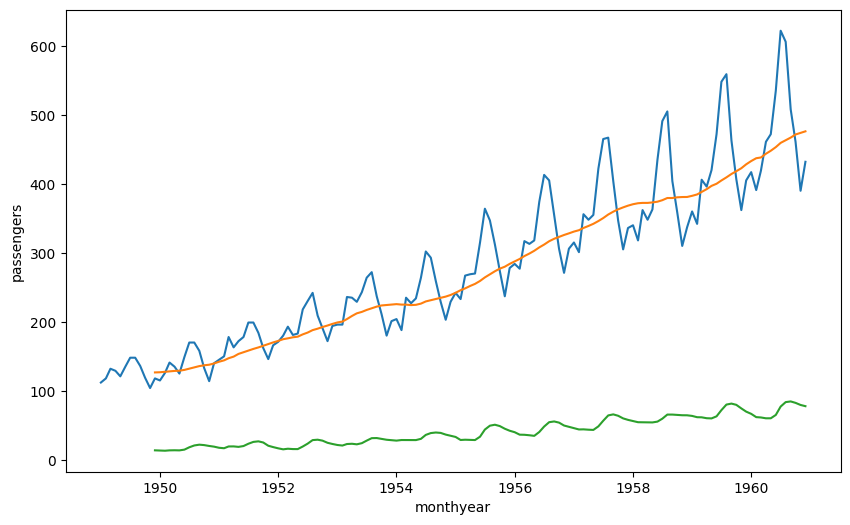

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=new_df, x = new_df.index,y = new_df['passengers'])
sns.lineplot(data=new_df, x = new_df.index,y = new_df['rollMean'])
sns.lineplot(data=new_df, x = new_df.index,y = new_df['rollstd'])
plt.show()

### 2. Using ADF[Augmented Dickey–Fuller Test]

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfTest  = adfuller(new_df['passengers'])
adfTest

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
stats = pd.Series(adfTest[0:4],index = ['Test Statistic','p-value','No.lags used','number of observations used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
No.lags used                    13.000000
number of observations used    130.000000
dtype: float64

In [ ]:
for i,j in adfTest[4].items():
    print('criticality',i,':',j)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


You can see that Test Statistic is greater than criticality that means that the data is non stationary and the p-value < 0.05 (level of significance)

### Now will try to create a function for startionary check

In [ ]:
def test_stationarity(new_df,var):
    new_df['rollMean'] = new_df[var].rolling(window = 12).mean()
    new_df['rollstd'] = new_df[var].rolling(window = 12).std()

    from statsmodels.tsa.stattools import adfuller
    adfTest  = adfuller(new_df[var])
    stats = pd.Series(adfTest[0:4],index = ['Test Statistic','p-value','No.lags used','number of observations used'])
    print(stats)

    for i,j in adfTest[4].items():
        print('criticality',i,':',j)

    sns.lineplot(data=new_df, x = new_df.index,y = new_df[var])
    sns.lineplot(data=new_df, x = new_df.index,y = new_df['rollMean'])
    sns.lineplot(data=new_df, x = new_df.index,y = new_df['rollstd'])

    if adfTest[1]<0.05:
        print('The data is Stationary')
    else:
        print('The data is non stationary')

In [ ]:
new_df.head()

,passengers,rollMean,rollstd
monthyear,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN


### Now will try to make the data stationary

There are 3 ways we can make the data stationary
1. Time Shift (differencing)
2. Log transformation
3. Square root or cube root transformation

### 1. Time Shift - first order differencing (lag-1)

In [ ]:
new_df.passengers.diff()

monthyear
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: passengers, Length: 144, dtype: float64

In [ ]:
new_df.passengers - new_df.passengers.shift()

monthyear
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: passengers, Length: 144, dtype: float64

In [ ]:
new_df['shift1'] = new_df.passengers.diff()

Test Statistic                  -2.719697
p-value                          0.070691
No.lags used                    12.000000
number of observations used    120.000000
dtype: float64
criticality 1% : -3.486055829282407
criticality 5% : -2.8859430324074076
criticality 10% : -2.5797850694444446
The data is non stationary


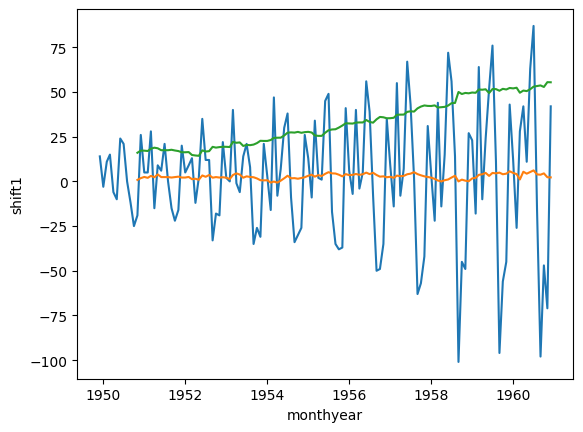

In [ ]:
test_stationarity(new_df.dropna(),'shift1')

### 1. Time Shift - second order differencing (lag-2)

In [ ]:
new_df['shift2'] = new_df.passengers.diff(2)
new_df.head(5)

,passengers,rollMean,rollstd,shift1,shift2
monthyear,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,6.0,NaN
1949-03-01,132,NaN,NaN,14.0,20.0
1949-04-01,129,NaN,NaN,-3.0,11.0
1949-05-01,121,NaN,NaN,-8.0,-11.0


Test Statistic                  -2.951603
p-value                          0.039668
No.lags used                    11.000000
number of observations used    121.000000
dtype: float64
criticality 1% : -3.485585145896754
criticality 5% : -2.885738566292665
criticality 10% : -2.5796759080663887
The data is Stationary


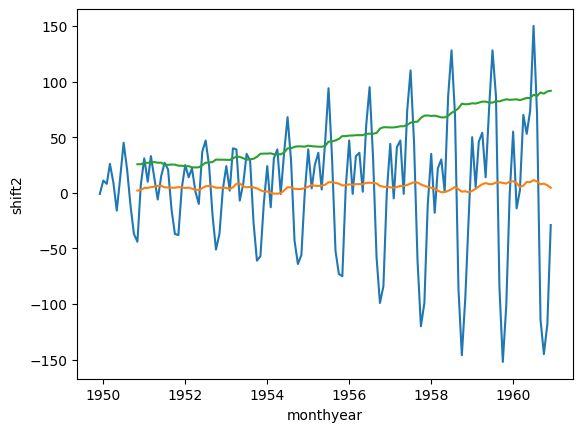

In [ ]:
test_stationarity(new_df.dropna(),'shift2')

### We can see in the second order differencing the data has become stationary (d = 2)

### Now will build ARIMA Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
new_df.head()

,passengers,rollMean,rollstd,shift1,shift2
monthyear,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,6.0,NaN
1949-03-01,132,NaN,NaN,14.0,20.0
1949-04-01,129,NaN,NaN,-3.0,11.0
1949-05-01,121,NaN,NaN,-8.0,-11.0


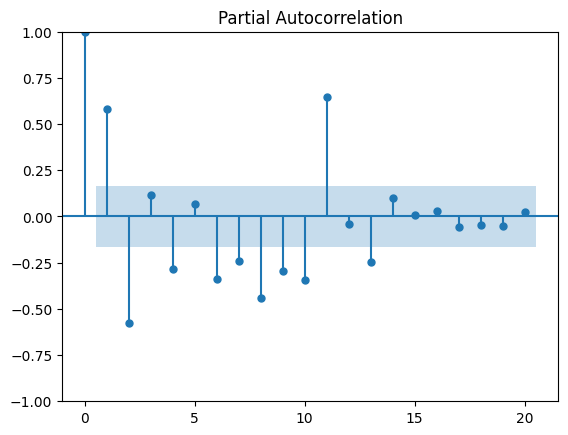

In [ ]:
# Now will plot PACF Graph to find the value of p

plot_pacf(new_df['shift2'].dropna(),lags = 20);

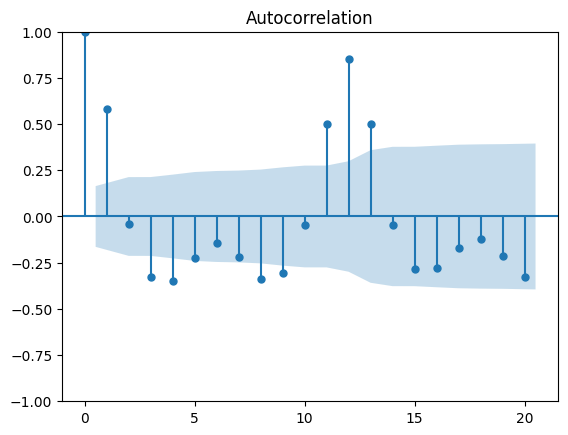

In [ ]:
# Now will plot PACF Graph to find the value of Q

plot_acf(new_df['shift2'].dropna(),lags = 20);

In [ ]:
# {p : 2, d:2, q:1}

In [ ]:
train = new_df[:round(len(new_df)*.70)]
test = new_df[round(len(new_df)*.70):]
train.head()

,passengers,rollMean,rollstd,shift1,shift2
monthyear,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,6.0,NaN
1949-03-01,132,NaN,NaN,14.0,20.0
1949-04-01,129,NaN,NaN,-3.0,11.0
1949-05-01,121,NaN,NaN,-8.0,-11.0


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Replace the old ARIMA class with the new ARIMA implementation
model = ARIMA(train['passengers'], order=(17, 2, 8))
model = model.fit()
prediction = model.predict(start = test.index[0],end = test.index[-1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
test['prediction'] = prediction

<Axes: xlabel='monthyear', ylabel='passengers'>

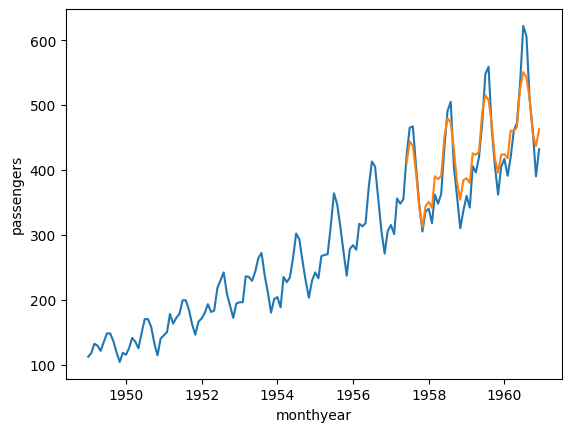

In [ ]:
sns.lineplot(data  = new_df,x = new_df.index, y = new_df.passengers)
sns.lineplot(data = test, x = test.index,y = test.prediction)

In [ ]:
new_df

,passengers,rollMean,rollstd,shift1,shift2
monthyear,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,6.0,NaN
1949-03-01,132,NaN,NaN,14.0,20.0
1949-04-01,129,NaN,NaN,-3.0,11.0
1949-05-01,121,NaN,NaN,-8.0,-11.0
...,...,...,...,...,...
1960-08-01,606,463.333333,83.630500,-16.0,71.0
1960-09-01,508,467.083333,84.617276,-98.0,-114.0
1960-10-01,461,471.583333,82.541954,-47.0,-145.0


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pmdarima import auto_arima

### Now will build AutoARIMA Model

In [ ]:
# Perform AutoARIMA
model = auto_arima(train['passengers'], seasonal=True, m=12)  # Set seasonal=True for seasonal data with period m=12 (monthly data)

In [ ]:
# Summary of the best model
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  101
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -322.277
Date:                            Tue, 13 Feb 2024   AIC                            650.553
Time:                                    07:16:39   BIC                            657.985
Sample:                                01-01-1949   HQIC                           653.548
                                     - 05-01-1957                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2445      0.096     -2.551      0.011      -0.432      -0.057
ar.S.L12      -0.2124      0.086   

In [ ]:
# Make forecast
test['prediction_AA'] = model.predict(n_periods=43)  # Forecast the next 43 periods
test

,passengers,rollMean,rollstd,shift1,shift2,prediction,prediction_AA
monthyear,,,,,,,
1957-06-01,422,346.083333,48.451397,67.0,74.0,410.262382,407.967204
1957-07-01,465,350.416667,56.617470,43.0,110.0,444.116268,449.261267
1957-08-01,467,355.583333,64.351956,2.0,45.0,437.066436,439.308273
1957-09-01,404,359.666667,65.848771,-63.0,-61.0,393.511856,392.504029
1957-10-01,347,363.083333,63.844211,-57.0,-120.0,343.192617,345.837626
1957-11-01,305,365.916667,60.026446,-42.0,-99.0,311.536780,310.413491
1957-12-01,336,368.416667,57.890898,31.0,-11.0,344.088150,346.687572
1958-01-01,340,370.500000,56.219537,4.0,35.0,350.893233,355.050493
1958-02-01,318,371.916667,54.496803,-22.0,-18.0,341.374188,342.537085


<Axes: xlabel='monthyear', ylabel='passengers'>

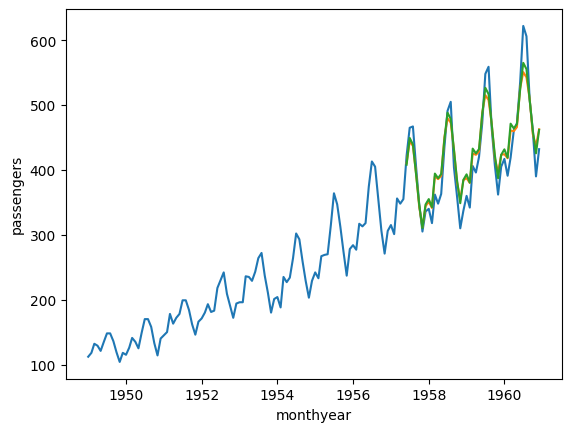

In [ ]:
sns.lineplot(data  = new_df,x = new_df.index, y = new_df.passengers)
sns.lineplot(data = test, x = test.index,y = test.prediction)
sns.lineplot(data = test, x = test.index,y = test.prediction_AA)

### Now will evaluate our model

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test['passengers'],test['prediction']))

28.964987808844523

In [ ]:
np.sqrt(mean_squared_error(test['passengers'],test['prediction_AA']))

27.12101628472843

## Now will build the model using SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
test.head()

,passengers,rollMean,rollstd,shift1,shift2,prediction,prediction_AA
monthyear,,,,,,,
1957-06-01,422,346.083333,48.451397,67.0,74.0,410.262382,407.967204
1957-07-01,465,350.416667,56.617470,43.0,110.0,444.116268,449.261267
1957-08-01,467,355.583333,64.351956,2.0,45.0,437.066436,439.308273
1957-09-01,404,359.666667,65.848771,-63.0,-61.0,393.511856,392.504029
1957-10-01,347,363.083333,63.844211,-57.0,-120.0,343.192617,345.837626


In [ ]:
model_s = SARIMAX(train['passengers'],order = (2,2,1),seasonal_order = (2,2,1,12))
model_s = model_s.fit()
prediction_SM = model_s.predict(start = test.index[0],end = test.index[-1])
test['prediction_SM'] = prediction_SM

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
test.head()

,passengers,rollMean,rollstd,shift1,shift2,prediction,prediction_AA,prediction_SM
monthyear,,,,,,,,
1957-06-01,422,346.083333,48.451397,67.0,74.0,410.262382,407.967204,413.193312
1957-07-01,465,350.416667,56.617470,43.0,110.0,444.116268,449.261267,460.679214
1957-08-01,467,355.583333,64.351956,2.0,45.0,437.066436,439.308273,447.578294
1957-09-01,404,359.666667,65.848771,-63.0,-61.0,393.511856,392.504029,395.206874
1957-10-01,347,363.083333,63.844211,-57.0,-120.0,343.192617,345.837626,345.179018


<Axes: xlabel='monthyear', ylabel='passengers'>

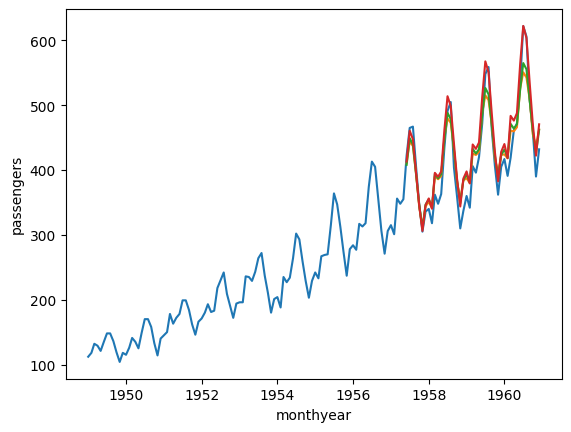

In [ ]:
sns.lineplot(data  = new_df,x = new_df.index, y = new_df.passengers)
sns.lineplot(data = test, x = test.index,y = test.prediction)
sns.lineplot(data = test, x = test.index,y = test.prediction_AA)
sns.lineplot(data = test, x = test.index,y = test.prediction_SM)

In [ ]:
np.sqrt(mean_squared_error(test['passengers'],test['prediction_SM']))

27.50742433714926

In [ ]:
test

,passengers,rollMean,rollstd,shift1,shift2,prediction,prediction_AA,prediction_SM
monthyear,,,,,,,,
1957-06-01,422,346.083333,48.451397,67.0,74.0,410.262382,407.967204,413.193312
1957-07-01,465,350.416667,56.617470,43.0,110.0,444.116268,449.261267,460.679214
1957-08-01,467,355.583333,64.351956,2.0,45.0,437.066436,439.308273,447.578294
1957-09-01,404,359.666667,65.848771,-63.0,-61.0,393.511856,392.504029,395.206874
1957-10-01,347,363.083333,63.844211,-57.0,-120.0,343.192617,345.837626,345.179018
1957-11-01,305,365.916667,60.026446,-42.0,-99.0,311.536780,310.413491,306.118728
1957-12-01,336,368.416667,57.890898,31.0,-11.0,344.088150,346.687572,345.728999
1958-01-01,340,370.500000,56.219537,4.0,35.0,350.893233,355.050493,356.197777
1958-02-01,318,371.916667,54.496803,-22.0,-18.0,341.374188,342.537085,340.326374


### Now will Evaluate our model how good its performaing using r2-score

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2_ARIMA = r2_score(test['passengers'], test['prediction'])
print(f"R-squared using ARIMA: {r2_ARIMA}")

r2_Auto_ARIMA = r2_score(test['passengers'], test['prediction_AA'])
print(f"R-squared using ARIMA: {r2_Auto_ARIMA}")

r2_SARIMAX = r2_score(test['passengers'], test['prediction_SM'])
print(f"R-squared using ARIMA: {r2_SARIMAX}")

R-squared using ARIMA: 0.857223228286951
R-squared using ARIMA: 0.8748235078970557
R-squared using ARIMA: 0.8712311811674135
